# <span style="color:turquoise">D208 Performance Assessment NBM2 Task 2</span>
## <span style="color:turquoise">Logistic Regression for Predictive Modeling</span>
&emsp;Ryan L. Buchanan
<br>&emsp;Student ID:  001826691
<br>&emsp;Masters Data Analytics (12/01/2020)
<br>&emsp;Program Mentor:  Dan Estes
<br>&emsp;(385) 432-9281 (MST)
<br>&emsp;rbuch49@wgu.edu


### <span style="color:Gold"><b>Part I: Research Question</b></span>

A.  Describe the purpose of this data analysis by doing the following:

1.  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple regression.

2.  Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.

### <span style="color:green"><b>A1. Research Question</b>:</span>
Which customers are likely to churn next soon?  And, which customer features/variables are most significant to churn?

### <span style="color:green"><b>A2. Objectives & Goals</b>:</span>
Stakeholders in the company will benefit by knowing, with some measure of confidence, which customers are likely to churn soon because this will provide weight for decisions in marketing improved services to customers with these characteristics and past user experiences.

### <span style="color:green"><b>B1. Summary of Assumptions</b>:</span>
Assumptions of a logistic regression model include:
* It is based on the Bernoulli distribution rather than Gaussian because the dependent variable is binary (to churn or not to churn).
* The predicted values are restricted to a range of nomial values: "Yes" or "No."
* It predicts the <i>probability</i> of particular outcomes rather than the outcome itself.
* It is a logarithm of the odds of achieving 1.

### <span style="color:green"><b>B2. Tool Benefits</b>:</span>
Python & IPython Jupyter notebooks will be used to support this analysis.  Python offers very intuitive, simple & versatile programming style & syntax, as well as a large system of mature packages for data science & machine learning.  Since, Python is cross-platform, it will work well whether consumers of the analysis are using Windows PCs or a MacBook laptop.  It is fast when compared with other possible programming languages like R or MATLAB (Massaron, p. 8).
<br> &emsp; Also, there is strong support for Python as the most popular data science programming language in popular literature & media (<a target="_blank" href="https://www.cbtnuggets.com/blog/technology/data/why-data-scientists-love-python">CBTNuggets</a>)

### <span style="color:green"><b>B3. Appropriate Technique</b>:</span>
Logistic regression is an appropriate technique to analyze the research question because or dependent variable is binomial, "Yes" or "No."  We want to find out what the likelihood of customer churn is for individual customers, based on a list of independent variables (area type, job, children, age, income, etc.).  It will improve our understanding of increaed probability of churn as we include or remove different independent variables & find out whether or not they have a positive or negative relationship to our target variable.

### <span style="color:Gold"><b>Part III: Data Preparation</b></span>

C.  Summarize the data preparation process for logistic regression analysis by doing the following:

1.  Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

2.  Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

3.  Explain the steps used to prepare the data for the analysis, including the annotated code.

4.  Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

5.  Provide a copy of the prepared data set.

### <span style="color:green"><b>C1. Data Goals</b>:</span>
Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

### <span style="color:green"><b>C2. Summary Statistics</b>:</span>
Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

### <span style="color:green"><b>C3. Steps to Prepare Data</b>:</span>
Explain the steps used to prepare the data for the analysis, including the annotated code.

### <span style="color:green"><b>C4. Visualizations</b>:</span>
Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

#### <span style="color:red">For univariate, use histograms.  Make to show the statistics for each variable with describe() method. For categorical variables display with horizontal bar.  For bivariate relationships, scatterplot. </span>


### <span style="color:green"><b>C5. Prepared Dataset</b>:</span>
Provide a copy of the prepared data set.

In [1]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


# Import chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Change color of Matplotlib font
import matplotlib as mpl

COLOR = 'aquamarine'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [5]:
# Load data set into Pandas dataframe
df = pd.read_csv('Data/churn_clean.csv')

# Rename last 8 survey columns for better description of variables
df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'Fixes', 
                     'Item3':'Replacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'Respectfulness', 
                     'Item7':'Courteous', 
                     'Item8':'Listening'}, 
          inplace=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


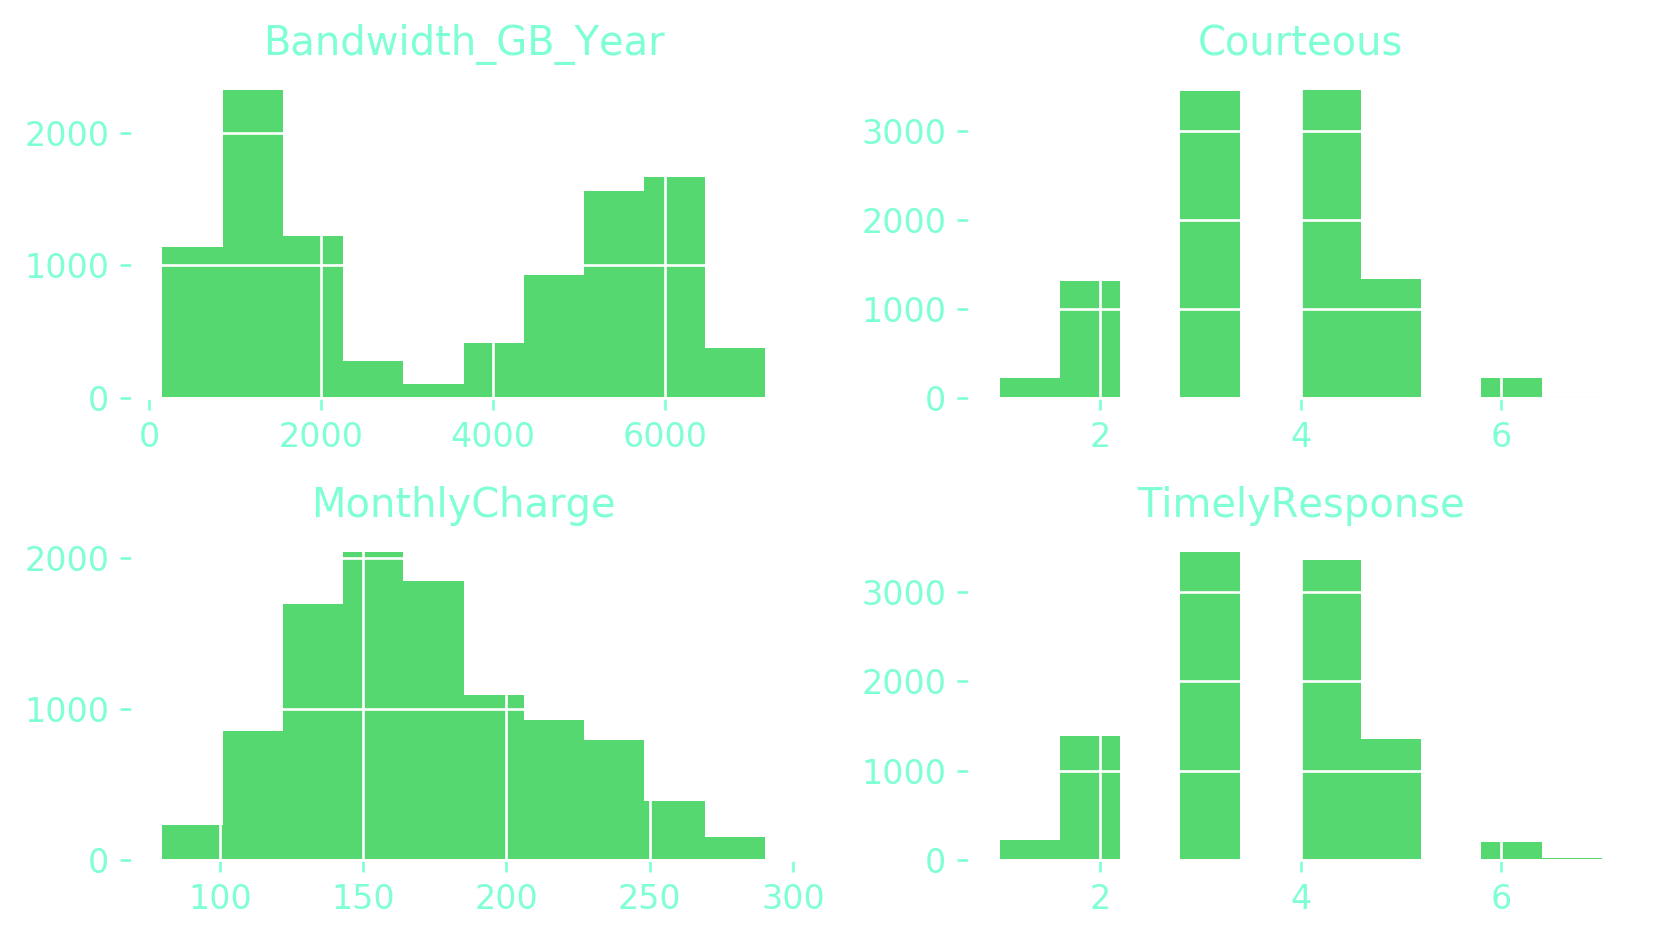

In [6]:
# Create histograms of contiuous & categorical variables
df[['MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'Courteous']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout();

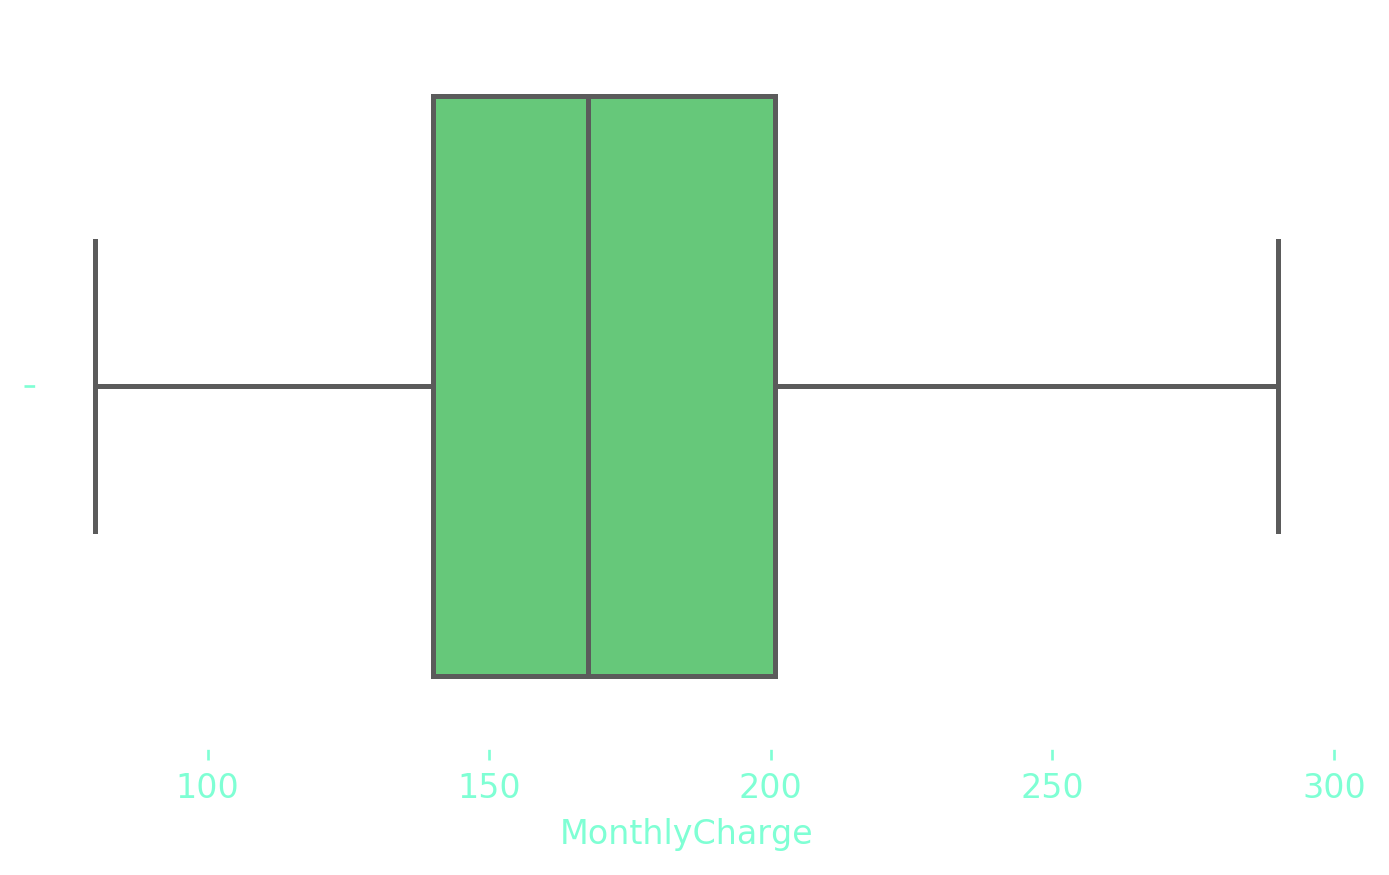

In [7]:
# Create Seaborn boxplots for continuous & categorical variables
sns.boxplot('MonthlyCharge', data = df)
plt.show()

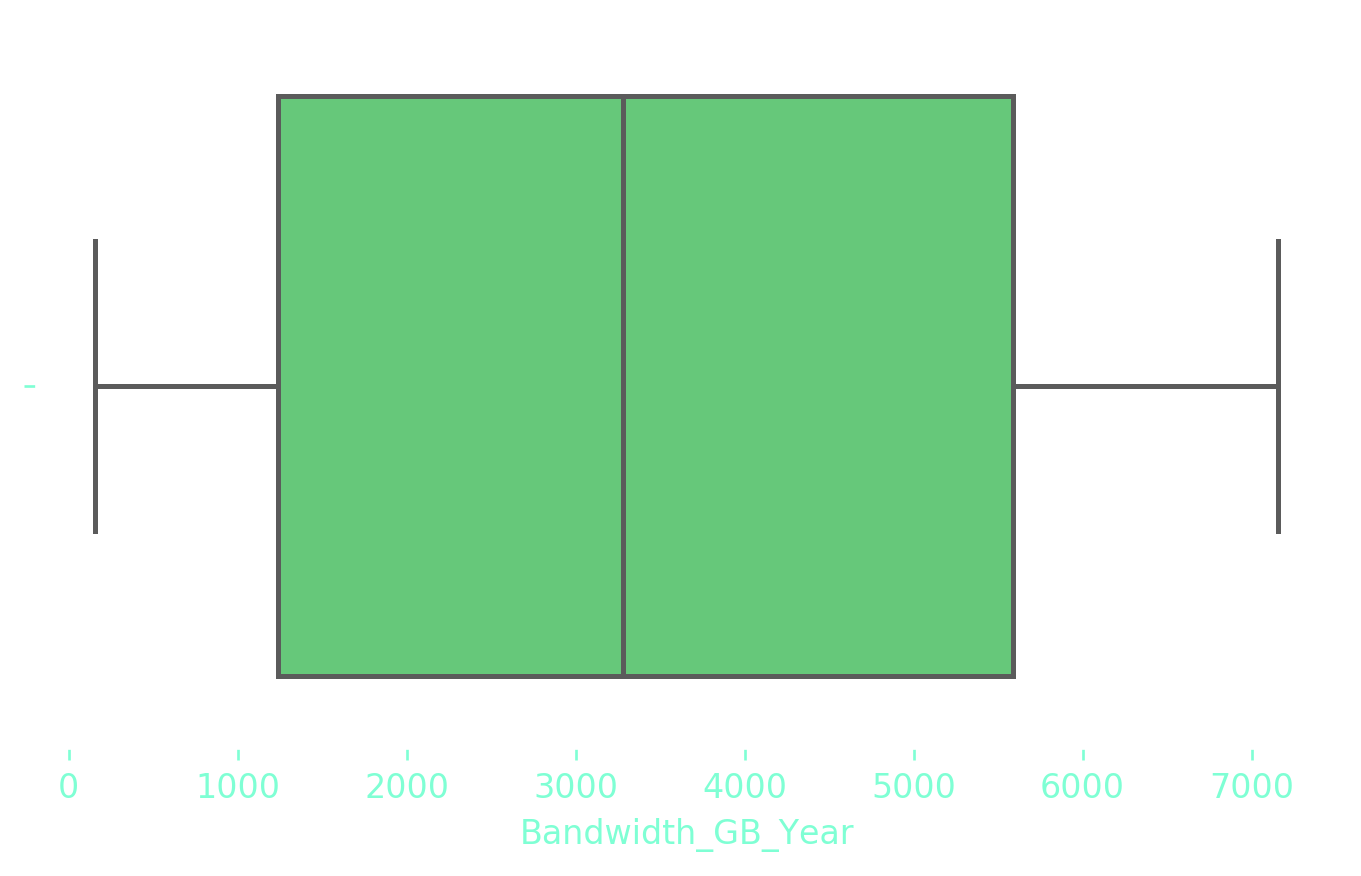

In [8]:
sns.boxplot('Bandwidth_GB_Year', data = df)
plt.show()

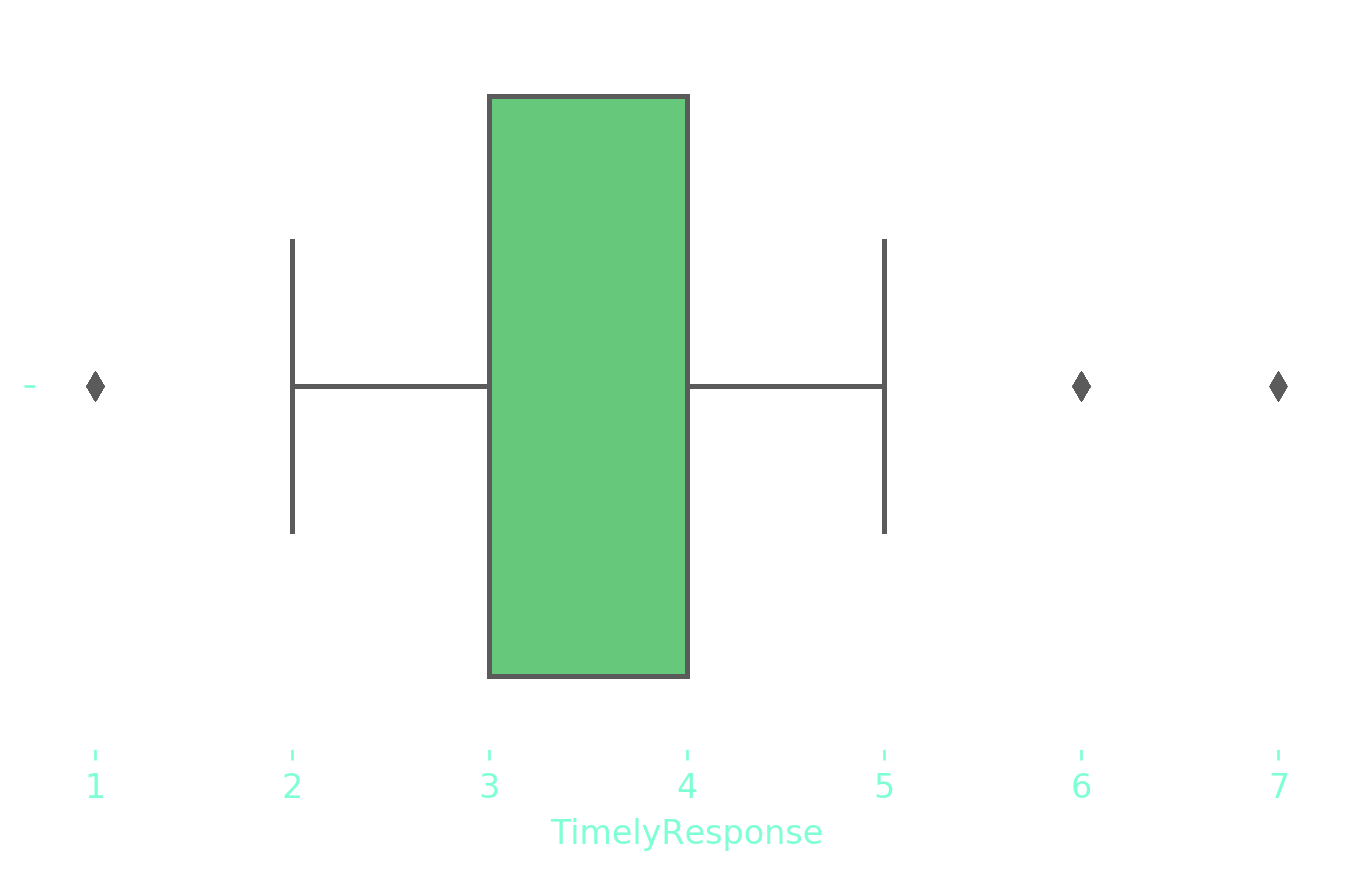

In [9]:
sns.boxplot('TimelyResponse', data = df)
plt.show()

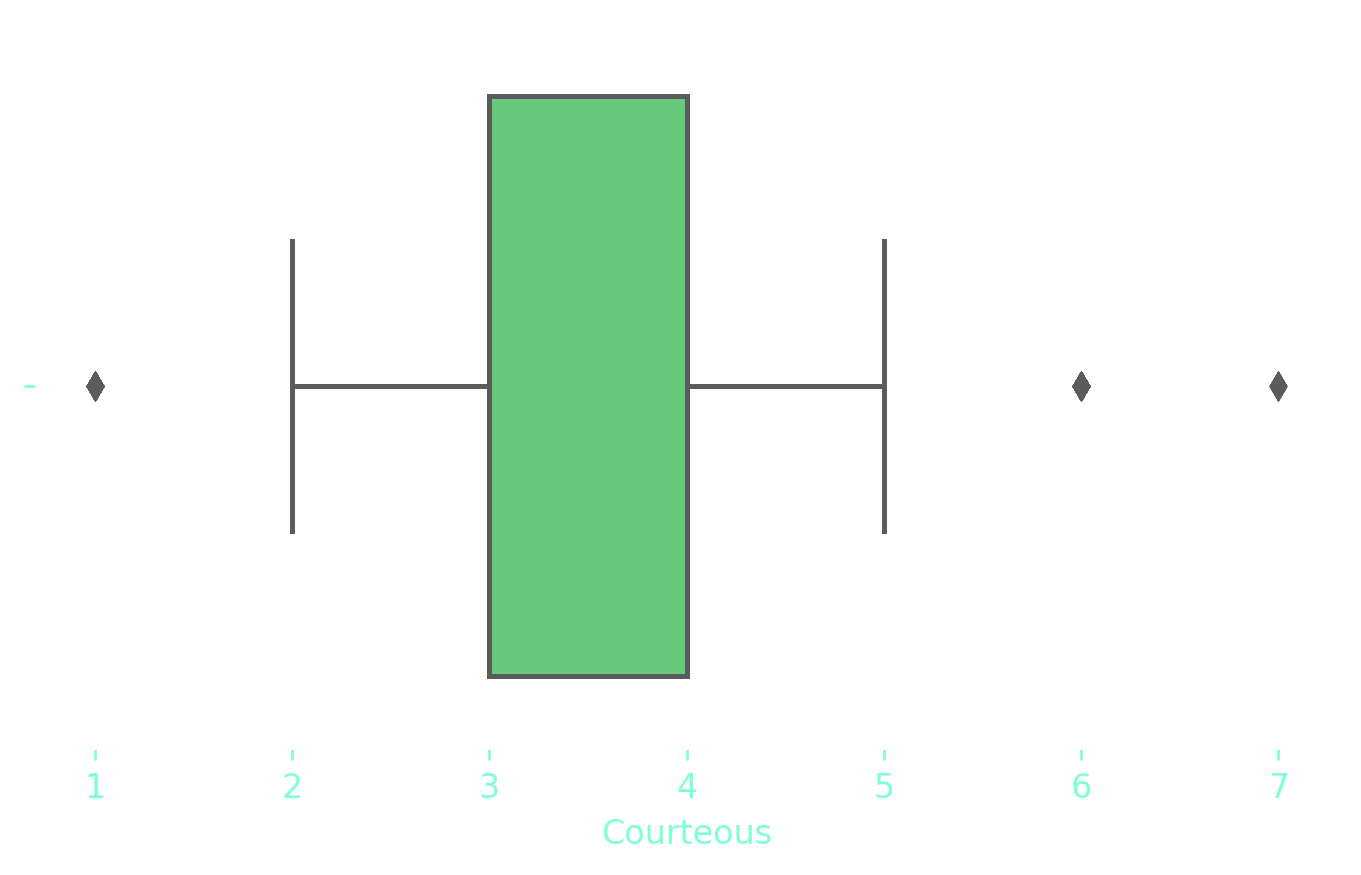

In [10]:
sns.boxplot('Courteous', data = df)
plt.show()

### <span style='color:Gold'><b>Part IV: Model Comparison and Analysis</b></span>

D.  Compare an initial and a reduced logistic regression model by doing the following:

1.  Construct an initial logistic regression model from all predictors that were identified in Part C2.

2.  Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

3.  Provide a reduced logistic regression model that includes both categorical and continuous variables.



<span style='color:red'>Note: The output should include a screenshot of each model.</span>

### <span style="color:green"><b>D1. Initial Model</b></span>
Construct an initial logistic regression model from all predictors that were identified in Part C2.

<span style='color:red'>Note: Clearly state regression equation, for example:</span>

<span style='color:red'><b>   "four indpendent vars: y = -0.878 + 0.01 * Age + 0.31 * Female + 0.22 * Education + 0.09 * Income"</b></span>


### <span style="color:green"><b>D2. Justification of Model Reduction</b></span>
Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

### <span style="color:green"><b>D3. Reduced Multiple Regression Model</b></span>
Provide a reduced logistic regression model that includes both categorical and continuous variables.


<span style='color:red'>Note: Heatmap of missing values vs observed</span>

### <span style='color:Gold'><b>Part IV: E</b></span>
E.  Analyze the data set using your reduced logistic regression model by doing the following:

1.  Explain your data analysis process by comparing the initial and reduced logistic regression models, including the following elements:
<ul>
    <li>
    the logic of the variable selection technique
    </li>
    <li>
    the model evaluation metric
    </li>
    <li>
    a residual plot
    </li>
</ul>
2.  Provide the output and any calculations of the analysis you performed, including the model’s residual error.



<span style='color:red'>Note: The output should include the predictions from the refined model you used to perform the analysis. </span>



3.  Provide the code used to support the implementation of the logistic regression models.



### <span style="color:green"><b>E1. Model Comparison</b></span>
Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:
<ul>
    <li>
    the logic of the variable selection technique
    </li>
    <li>
    the model evaluation metric
    </li>
    <li>
    a residual plot
    </li>
</ul>


<span style='color:red'>Note: Verbatim from fasttrack description of analysis of Titanic dataset, 
<br>"Since male is the dummy variable, being male reduces the log odds by 2.75 while a unit increase in age reduces log odds by 0.037." </span>

### <span style="color:green"><b>E2. Output & Calculations</b></span>
Provide the output and any calculations of the analysis you performed, including the model’s residual error.



<span style='color:red'>Note: The output should include the predictions from the refined model you used to perform the analysis. </span>

### <span style="color:green"><b>E3. Code</b></span>
Provide the code used to support the implementation of the logistic regression models.

### <span style='color:Gold'><b>Part V: Data Summary and Implications</b></span>

F.  Summarize your findings and assumptions by doing the following:

1.  Discuss the results of your data analysis, including the following elements:
<ul>
    <li>
    a regression equation for the reduced model
    </li>
    <li>
    an interpretation of coefficients of the statistically significant variables of the model
    </li>
    <li>
    the statistical and practical significance of the model
    </li>
    <li>
    the limitations of the data analysis
    </li>
</ul>
2.  Recommend a course of action based on your results.

### <span style="color:green"><b>F1. Results</b></span>
 Discuss the results of your data analysis, including the following elements:
<ul>
    <li>
    a regression equation for the reduced model
    </li>
    <li>
    an interpretation of coefficients of the statistically significant variables of the model
    </li>
    <li>
    the statistical and practical significance of the model
    </li>
    <li>
    the limitations of the data analysis
    </li>
</ul>

### <span style="color:green"><b>F2. Recommendations</b></span>
Recommend a course of action based on your results.

### <span style='color:Gold'><b>Part VI: Demonstration</b></span>

G.  Provide a Panopto video recording that includes all of the following elements:

•  a demonstration of the functionality of the code used for the analysis

•  an identification of the version of the programming environment

•  a comparison of the two multiple regression models you used in your analysis

•  an interpretation of the coefficients.



### <span style="color:green"><b>G. Video</b></span>
<span style="color:red">link</span>

### <span style="color:green">H. Sources for Third-Party Code</span>

Kaggle. (2018, May 01). Bivariate plotting with pandas. Kaggle. https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas#

<br> Sree. &ensp; (2020, October 26). &ensp; <i>Predict Customer Churn in Python.</i> &ensp; Towards Data Science. https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

<br> Wikipedia. (2021, May 31). Bivariate Analysis. https://en.wikipedia.org/wiki/Bivariate_analysis#:~:text=Bivariate%20analysis%20is%20one%20of,the%20empirical%20relationship%20between%20them.&text=Like%20univariate%20analysis%2C%20bivariate%20analysis%20can%20be%20descriptive%20or%20inferential.

### <span style="color:green">I. Sources</span>

Ahmad, A. K., Jafar, A & Aljoumaa, K. &ensp; (2019, March 20). &ensp; <i>Customer churn prediction in telecom using machine learning in big data platform</i>. &ensp; Journal of Big Data. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0191-6

<br> Altexsoft. &ensp; (2019, March 27). &ensp; <i>Customer Churn Prediction Using Machine Learning: Main Approaches and Models</i>. &ensp; Altexsoft. &ensp; &ensp; https://www.altexsoft.com/blog/business/customer-churn-prediction-for-subscription-businesses-using-machine-learning-main-approaches-and-models/

<br> Bruce, P., Bruce A. & Gedeck P. &ensp; (2020). &ensp; <i>Practical Statistics for Data Scientists</i>. &ensp; O'Reilly.

<br> CBTNuggets. &ensp; (2018, September 20). &ensp; <i>Why Data Scientists Love Python</i>. &ensp; https://www.cbtnuggets.com/blog/technology/data/why-data-scientists-love-python

<br> Freedman, D. Pisani, R. & Purves, R. &ensp; (2018). &ensp; <i>Statistics</i>. &ensp; W. W. Norton & Company, Inc. 

<br> Frohbose, F. &ensp; (2020, November 24). &ensp; <i>Machine Learning Case Study: Telco Customer Churn Prediction</i>.  &ensp; Towards Data Science. &ensp; https://towardsdatascience.com/machine-learning-case-study-telco-customer-churn-prediction-bc4be03c9e1d

<br> Griffiths, D. &ensp; (2009). &ensp; <i>A Brain-Friendly Guide: Head First Statistics</i>. &ensp; O'Reilly.

<br> Grus, J. &ensp; (2015). &ensp; <i>Data Science from Scratch</i>. &ensp; O'Reilly.

<br> Massaron, L. & Boschetti, A. &ensp; (2016). &ensp; <i>Regression Analysis with Python</i>. &ensp; Packt Publishing.

<br> McKinney, W. &ensp; (2018). &ensp; <i>Python for Data Analysis</i>. O'Reilly.

<br> Rossant, C. (2018). &ensp; <i>IPython Interactive Computing & Visualization Cookbook, 2nd Edition</i>. &ensp; Packt Publishing.

<br> Rossant, C. (2015). &ensp; <i>Learning IPython Interactive Computing & Visualization, 2nd Edition</i>. &ensp; Packt Publishing.

<br> VanderPlas, J. &ensp; (2017). &ensp; <i>Python Data Science Handbook</i>. &ensp; O'Reilly.

In [11]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('D208_Performance_Assessment_NBM2_Task_1.ipynb')

'wget' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'colab_pdf'